In [28]:
import numpy as np
import pandas as pd
from skimage import io
from skimage import img_as_ubyte
from IPython.display import Image, display
from matplotlib import pyplot as plt
from scipy.misc import imresize
import math
import cv2

In [2]:
currentImageWidth = 0
currentImageHeight = 0

In [3]:
def openImageAsGreyScale(imageFileName):
    return io.imread(imageFileName, as_grey=True)

In [4]:
def displayGreyScaleImage(numpyArrayOfGreyScaleImage):
    plt.imshow(numpyArrayOfGreyScaleImage, interpolation='nearest')
    plt.gray()
    plt.show()

In [78]:
def createEmptyArrayTheSameSizeAs(numpyArray):
    
    imageShape = numpyArray.shape
    return np.zeros_like(numpyArray, dtype=np.float)

Width: 1123, Height: 748


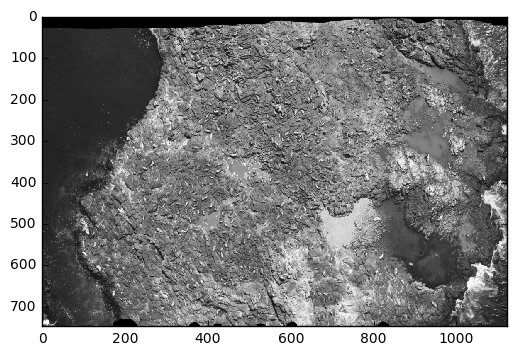

In [30]:
sealionImage = openImageAsGreyScale('./TrainSmall/TrainDotted/0.jpg');

sealionImage = imresize(sealionImage, .2, interp='bilinear', mode=None)

currentImageWidth = sealionImage.shape[1]
currentImageHeight = sealionImage.shape[0]

print("Width: %d, Height: %d" % (currentImageWidth, currentImageHeight))
displayGreyScaleImage(sealionImage)



In [60]:
def calcGaussian(radius, peakHeight, sigma, offset=0):
    
    return peakHeight * math.exp(-(math.pow(radius, 2)/(2*math.pow(sigma, 2)))) + offset;

In [73]:

display(calcGaussian(calcPixelDistanceToTopLeftOfImageModulo((100, 100), 2, 1), 1, 1))
display(calcGaussian(1, 1, 70))

0.08208499862389876

0.9998979643896605

In [62]:
def setPixelFromThreshold(radius, threshold):
    
    return int(radius <= threshold)

In [63]:
def calcPixelDistanceToTopLeftOfImageModulo(imageShape, x, y):
    
    imageWidth = imageShape[1]
    imageHeight = imageShape[0]
    
    if x > imageWidth/2:
        x = x - imageWidth
        
    if y > imageHeight/2:
        y = y - imageHeight
    
    return math.sqrt(math.pow(x, 2) + math.pow(y, 2))

In [64]:
def filterCreationFunction(x, y):
    
    print('%d, %d' % (len(x), len(y)))
    radius = calcPixelDistanceToTopLeftOfImageModulo(x, y)
    return setPixelFromThreshold(radius, 7)

In [99]:
def generateFilterForImage(numpyImage, sigma):
    
    
    filterImage = createEmptyArrayTheSameSizeAs(numpyImage)
    
    
    for y in np.arange(filterImage.shape[0]):
        for x in np.arange(filterImage.shape[1]):
            radius = calcPixelDistanceToTopLeftOfImageModulo(filterImage.shape, x, y)
            #filterImage[y][x] = calcGaussian(radius, 1.0, sigma)
            filterImage[y][x] = setPixelFromThreshold(radius, sigma)
    
    return filterImage


In [101]:
def createFilterFFT(numpyImage):
    
    filterImage = generateFilterForImage(sealionImage, 3.5)
    return np.fft.fft2(filterImage)
    

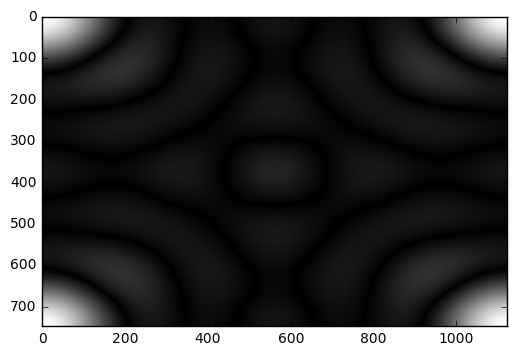

In [102]:
filterFFT = createFilterFFT(sealionImage)

displayGreyScaleImage(np.abs(filterFFT))

